In [1]:
import pandas as pd
import numpy as np

file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
web_traffic_df = pd.read_excel(file_path, sheet_name='web_traffic_accounts')

"evobanco.com/cuenta-inteligente  modified URL"

In [2]:
web_traffic_df.rename(columns={"evobanco.com/cuenta-inteligente":"evobanco.com/cuenta-inteligente/"}, inplace=True)

web_traffic_df.head(5)

,Date,abanca.com/es/cuentas/cuenta-online,n26.com/es-es/cuenta-sin-comisiones,bancsabadell.com/cuenta-online,ing.es/cuenta-nocuenta-ing,bbva.es/personas/productos/cuentas/cuenta-online-sin-comisiones.html,revolut.com/es-ES/a-radically-better-account/,openbank.es/cuenta-ahorro-bienvenida,myinvestor.es/cuentas-tarjetas/cuentas,n26.com/es-es/cuenta-ahorro,bankinter.com/banca/cuentas-tarjetas/cuentas/cuenta-nomina,ing.es/cuenta-nocuenta-ing.1,evobanco.com/cuenta-inteligente/,bancosantander.es/particulares/cuentas-tarjetas/cuentas-corrientes/cuenta-online-sin-comisiones
0,2021-12-01,15202.983835,6664.368911,NaN,NaN,45449.486787,1343.418328,NaN,5319.608623,NaN,8733.560835,NaN,5055.542564,22325.885971
1,2022-01-01,42183.913207,5310.177360,NaN,NaN,38306.464983,1531.016801,NaN,6577.851993,NaN,11410.593443,NaN,4539.012047,28331.245044
2,2022-02-01,34498.153115,5547.588971,NaN,NaN,40978.325821,1304.591257,NaN,4031.716960,NaN,8891.661053,NaN,6049.457905,23798.819170
3,2022-03-01,34546.319021,4900.271300,NaN,NaN,43970.545627,1105.180575,NaN,4941.009311,NaN,7446.925144,NaN,9826.193608,24808.561729
4,2022-04-01,40508.288420,4909.581023,NaN,NaN,40782.451956,1020.968713,NaN,5774.734455,NaN,10285.861726,NaN,5028.236254,24739.758729


In [3]:
web_traffic_df = web_traffic_df.reset_index(drop=True)
# Melting the DataFrame
long_web_traffic_df = web_traffic_df.melt(id_vars=['Date'], var_name='URL', value_name='Web Traffic')


# Ensure no 'index' labels incorrectly positioned
print(long_web_traffic_df.head(5))

        Date                                  URL   Web Traffic
0 2021-12-01  abanca.com/es/cuentas/cuenta-online  15202.983835
1 2022-01-01  abanca.com/es/cuentas/cuenta-online  42183.913207
2 2022-02-01  abanca.com/es/cuentas/cuenta-online  34498.153115
3 2022-03-01  abanca.com/es/cuentas/cuenta-online  34546.319021
4 2022-04-01  abanca.com/es/cuentas/cuenta-online  40508.288420


In [4]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/data/Account Products.xlsx'
bank_df = pd.read_excel(file_path, sheet_name='account_products')

bank_df.drop(columns=['Unnamed: 0'], inplace=True)
bank_df.head(5)

,account product,bank,url - bank product information
0,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones
1,Cuenta Online Sabadell,Banc Sabadell,bancsabadell.com/cuenta-online
2,Cuenta Clara Abanca,ABANCA,abanca.com/es/cuentas/cuenta-online
3,Cuenta Inteligente Bienvenida Evo,EVO Banco,evobanco.com/cuenta-inteligente/
4,Cuenta No Cuenta,ING,ing.es/cuenta-nocuenta-ing


In [5]:
long_web_traffic_df['Date'] = pd.to_datetime(long_web_traffic_df['Date'])
bank_df.rename(columns={'url - bank product information':'URL'},inplace=True)

long_web_traffic_df['URL'] = long_web_traffic_df['URL'].str.strip()
bank_df['URL'] = bank_df['URL'].str.strip()

web_traffic_merged_df = pd.merge(
    bank_df, 
    long_web_traffic_df, 
    how='left', 
    on=['URL']
)

display(web_traffic_merged_df.head(5)), web_traffic_merged_df['account product'].value_counts()

,account product,bank,URL,Date,Web Traffic
0,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2021-12-01,6664.368911
1,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-01-01,5310.177360
2,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-02-01,5547.588971
3,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-03-01,4900.271300
4,Cuenta N26,N26,n26.com/es-es/cuenta-sin-comisiones,2022-04-01,4909.581023


(None,
 account product
 Cuenta N26                           25
 Cuenta Online Sabadell               25
 Cuenta Clara Abanca                  25
 Cuenta Inteligente Bienvenida Evo    25
 Cuenta No Cuenta                     25
 Cuenta Online Sin Comisiones         25
 Cuenta Revolut                       25
 Cuenta Online Nómina Santander       25
 Cuenta Nómina                        25
 Cuenta Nómina hasta 5% TAE           25
 Cuenta de Ahorro N26                 25
 Cuenta 2,5% MyInvestor               25
 Cuenta de Ahorro Bienvenida          25
 Name: count, dtype: int64)

In [6]:
web_traffic_merged_df['bank'].value_counts()

bank
N26                50
ING                50
Banc Sabadell      25
ABANCA             25
EVO Banco          25
BBVA               25
Revolut            25
Banco Santander    25
Bankinter          25
MyInvestor         25
Openbank           25
Name: count, dtype: int64

In [7]:
file_path = 'D:/Hangze Wu/BSE/DSDM/semester3/Master Thesis/thesis project/MS/Account Products.xlsx'
df = pd.read_excel(file_path, sheet_name='google_trends')

display(df.head(5))

,Date,Abanca,Santander,Sabadell,BBVA,Bankinter,CaixaBank,EVO Banco,N26,Openbank
0,2021-12-05,6,58,28,41,11,7,2,1,4
1,2021-12-12,8,71,38,49,13,7,3,1,4
2,2021-12-19,8,65,33,47,12,6,3,1,4
3,2021-12-26,9,68,36,47,12,6,3,1,5
4,2022-01-02,8,61,31,46,11,6,3,1,5


In [8]:
google_df = df.copy()
google_df['Date'] = pd.to_datetime(google_df['Date'])

# Set 'Date' as index
google_df.set_index('Date', inplace=True)

google_df.sort_index(inplace=True)

# Filter for dates before 2022-01-01
filtered_df = google_df.loc['2021-1-01':]

google_df = filtered_df

# Resample to monthly frequency and aggregate data
monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function

# Reset index to have 'Month' as a column
monthly_google_df.reset_index(inplace=True)

monthly_google_df= monthly_google_df.reset_index(drop=True)
# Melting the DataFrame
long_monthly_google_df = monthly_google_df.melt(id_vars=['Date'], var_name='bank name', value_name='google trend')

long_monthly_google_df['Date'] = pd.to_datetime(long_monthly_google_df['Date'])
#long_monthly_google_df.set_index('Date', inplace=True)

long_monthly_google_df.head(3)

C:\Users\wuhangze\AppData\Local\Temp\ipykernel_22128\3576505576.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_google_df = google_df.resample('M').sum()  # Use sum, mean, or other aggregation function


,Date,bank name,google trend
0,2021-12-31,Abanca,31
1,2022-01-31,Abanca,39
2,2022-02-28,Abanca,29


In [9]:
long_monthly_google_df['bank name'].value_counts()

bank name
Abanca       25
Santander    25
Sabadell     25
BBVA         25
Bankinter    25
CaixaBank    25
EVO Banco    25
N26          25
Openbank     25
Name: count, dtype: int64

## Merge the banks, Web tarffic with Google Trend

In [10]:
web_traffic_merged_df.rename(columns={"bank":"bank_name"},inplace = True)
long_monthly_google_df.rename(columns={"bank name":"bank_name"},inplace=True)

In [14]:
# Convert the 'Date' columns to datetime format
web_traffic_merged_df['Date'] = pd.to_datetime(web_traffic_merged_df['Date'])

# Format the 'Date' columns to "YYYY-MM"
long_monthly_google_df['Date'] = long_monthly_google_df['Date'].dt.to_period('M').dt.to_timestamp()
web_traffic_merged_df['Date'] = web_traffic_merged_df['Date'].dt.to_period('M').dt.to_timestamp()

print("Google Trends DataFrame:")
print(long_monthly_google_df.head(5))
print("\nWeb Traffic DataFrame:")
print(web_traffic_merged_df.head(5))

Google Trends DataFrame:
         Date bank_name  google trend
75 2021-12-01      BBVA           184
76 2022-01-01      BBVA           238
77 2022-02-01      BBVA           192
78 2022-03-01      BBVA           175
79 2022-04-01      BBVA           173

Web Traffic DataFrame:
  account product bank_name                                  URL       Date  \
0      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2021-12-01   
1      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-01-01   
2      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-02-01   
3      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-03-01   
4      Cuenta N26       N26  n26.com/es-es/cuenta-sin-comisiones 2022-04-01   

   Web Traffic  
0  6664.368911  
1  5310.177360  
2  5547.588971  
3  4900.271300  
4  4909.581023  


In [12]:
bank_name_mapping = {
    'N26': 'N26',
    'ING': 'ING',
    'Banc Sabadell': 'Sabadell',
    'ABANCA': 'Abanca',
    'EVO Banco': 'EVO Banco',
    'BBVA': 'BBVA',
    'Revolut': 'Revolut', # This one doesn't have a match in the provided Google Trends data, might need to check
    'Banco Santander': 'Santander',
    'Bankinter': 'Bankinter',
    'MyInvestor': None, # This one doesn't have a match in the provided Google Trends data
    'Openbank': 'Openbank'
}

In [21]:
# Apply the mapping dictionary to the long_monthly_google_df
long_monthly_google_df['bank_name'] = long_monthly_google_df['bank_name'].map(bank_name_mapping)
# Filter out rows with None values after mapping
long_monthly_google_df = long_monthly_google_df.dropna(subset=['bank_name'])

# Merge the DataFrames on 'bank_name' and 'Date'
merged_df = pd.merge(web_traffic_merged_df, long_monthly_google_df, on=['bank_name', 'Date'])

# Set index for panel data
#merged_df.set_index(['account product', 'Date'], inplace=True)
# Optional: Sort the DataFrame by the index
#merged_df.sort_index(inplace=True)

print("\nMerged DataFrame:")
print(merged_df[[ 'Web Traffic', 'google trend']])


Merged DataFrame:
      Web Traffic  google trend
0     6664.368911             4
1     5310.177360             5
2     5547.588971             4
3     4900.271300             4
4     4909.581023             4
..            ...           ...
145  11585.968429            16
146   8604.217515            18
147  11373.377132            22
148  10553.927787            14
149  24651.811838            21

[150 rows x 2 columns]


#### As some bank product dont have web traffic until it's website was built. so we only work the product that contain web traffic

In [23]:
# Determine the earliest date in the DataFrame
start_date = merged_df['Date'].min()

# Identify bank products that have data from the start date
valid_products = merged_df[merged_df['Date'] == start_date]['account product'].unique()

# Filter out bank products that do not have data from the start date
filtered_df = merged_df[merged_df['account product'].isin(valid_products)]

# Set index for panel data
filtered_df.set_index(['account product', 'Date'], inplace=True)

# Sort the DataFrame by the index
filtered_df.sort_index(inplace=True)

print("Filtered DataFrame:")
print(filtered_df[['google trend', 'Web Traffic']])

Filtered DataFrame:
                                              google trend   Web Traffic
account product                   Date                                  
Cuenta Inteligente Bienvenida Evo 2021-12-01            11   5055.542564
                                  2022-01-01            14   4539.012047
                                  2022-02-01            12   6049.457905
                                  2022-03-01            12   9826.193608
                                  2022-04-01            11   5028.236254
...                                                    ...           ...
Cuenta de Ahorro N26              2023-08-01             7   9104.383956
                                  2023-09-01             7   7935.475920
                                  2023-10-01             7   8796.029984
                                  2023-11-01             5   9529.609109
                                  2023-12-01             7  12034.247890

[150 rows x 2 columns]


In [24]:
# Check how many unique account products
unique_account_products = filtered_df.index.get_level_values('account product').nunique()
print(f"Number of unique account products: {unique_account_products}")

Number of unique account products: 6


### Fixed Effect: Web traffic = AR(2) + 12 months Dummies + Google trend

#### previous 2 Lag

In [31]:
# Ensure the DataFrame is sorted by account product and date
filtered_df = filtered_df.sort_index()

#filtered_df.drop(columns={"URL","bank_name"}, inplace=True)

# Create lagged variables for past 1 and 2 months of web traffic
filtered_df['Web Traffic_Lag1'] = filtered_df.groupby(level=0)['Web Traffic'].shift(1)
filtered_df['Web Traffic_Lag2'] = filtered_df.groupby(level=0)['Web Traffic'].shift(2)

# Drop rows with NaN values resulting from the lag operation
filtered_df = filtered_df.dropna()

print("DataFrame with lagged variables:")
print(filtered_df.head(3))

DataFrame with lagged variables:
                                              Web Traffic  google trend  \
account product                   Date                                    
Cuenta Inteligente Bienvenida Evo 2022-10-01  4082.431652            18   
                                  2022-11-01  6046.180546            12   
                                  2022-12-01  4019.240586            11   

                                              Web Traffic_Lag1  \
account product                   Date                           
Cuenta Inteligente Bienvenida Evo 2022-10-01       4338.912965   
                                  2022-11-01       4082.431652   
                                  2022-12-01       6046.180546   

                                              Web Traffic_Lag2  
account product                   Date                          
Cuenta Inteligente Bienvenida Evo 2022-10-01       5641.461711  
                                  2022-11-01       4338.912965  


#### 12 Month Dummies

In [32]:
# Extract month from the Date index and create dummy variables
filtered_df['Month'] = filtered_df.index.get_level_values('Date').month
monthly_dummies = pd.get_dummies(filtered_df['Month'], prefix='Month', drop_first=True)

# Concatenate the dummy variables with the original DataFrame
filtered_df = pd.concat([filtered_df, monthly_dummies], axis=1)

print("DataFrame with monthly dummy variables:")
print(filtered_df.head(3))


DataFrame with monthly dummy variables:
                                              Web Traffic  google trend  \
account product                   Date                                    
Cuenta Inteligente Bienvenida Evo 2022-10-01  4082.431652            18   
                                  2022-11-01  6046.180546            12   
                                  2022-12-01  4019.240586            11   

                                              Web Traffic_Lag1  \
account product                   Date                           
Cuenta Inteligente Bienvenida Evo 2022-10-01       4338.912965   
                                  2022-11-01       4082.431652   
                                  2022-12-01       6046.180546   

                                              Web Traffic_Lag2  Month  \
account product                   Date                                  
Cuenta Inteligente Bienvenida Evo 2022-10-01       5641.461711     10   
                                  

### Fixed Effect

In [34]:
from linearmodels.panel import PanelOLS
import statsmodels.api as sm

# Define the dependent variable and independent variables
y = filtered_df['Web Traffic']
X = filtered_df[['google trend', 'Web Traffic_Lag1', 'Web Traffic_Lag2'] + monthly_dummies.columns.tolist()]

# Add a constant term to the model
X = sm.add_constant(X)

# Fit the fixed effects model with entity effects (account product effects)
mod = PanelOLS(y, X, entity_effects=True, drop_absorbed=True)
res = mod.fit()

# Display the results
print(res)


                          PanelOLS Estimation Summary                           
Dep. Variable:            Web Traffic   R-squared:                        0.2137
Estimator:                   PanelOLS   R-squared (Between):              0.4630
No. Observations:                  64   R-squared (Within):               0.2137
Date:                Thu, Jun 06 2024   R-squared (Overall):              0.3775
Time:                        16:18:15   Log-likelihood                   -667.52
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      0.8734
Entities:                           5   P-value                           0.5909
Avg Obs:                       12.800   Distribution:                   F(14,45)
Min Obs:                       4.0000                                           
Max Obs:                       15.000   F-statistic (robust):             0.8734
                            

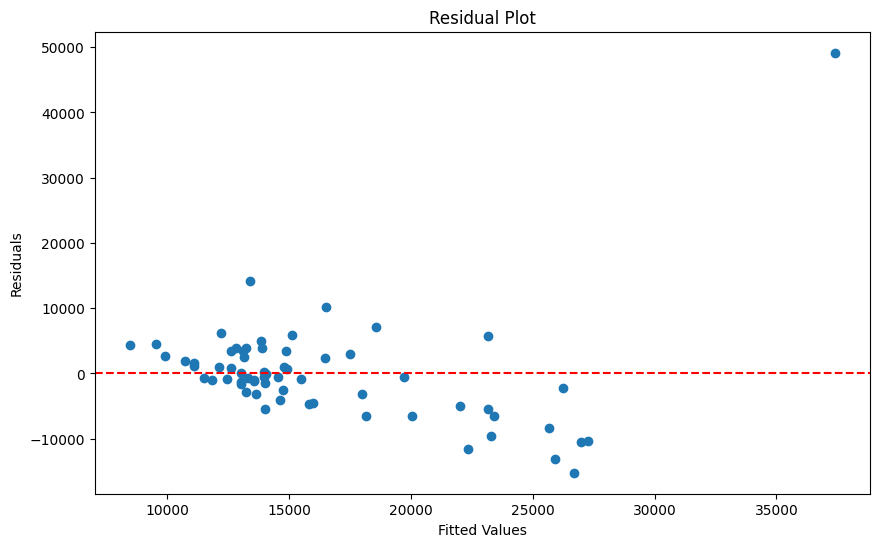

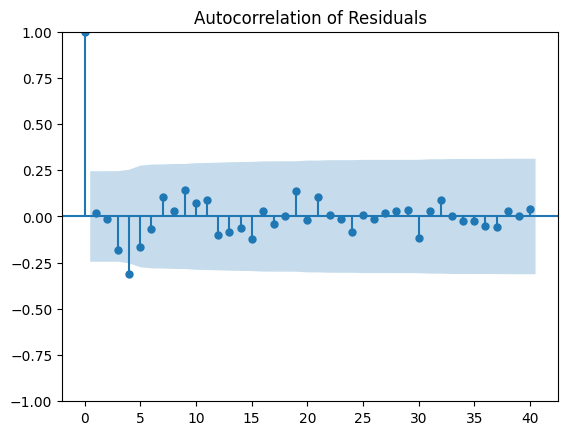

In [35]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Residual plot
residuals = res.resids
plt.figure(figsize=(10, 6))
plt.scatter(res.fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Autocorrelation plot
sm.graphics.tsa.plot_acf(residuals, lags=40)
plt.title('Autocorrelation of Residuals')
plt.show()


##### Fitted value is predicted value of dependent varibale 'web traffic'. It shows that, around 10,000 and 15,000 has highest predicted power that has smallest errors. 